# Algorithms for Data Science

## Finding Similar Items

The objective of this lab is to implement the Min-Hashing and Locality Sensitive Hashing. This lab needs Python and Jupyter, along with the NumPy package.

1. We first load the required libraries and the files containing the documents.

In [1]:
import sys
import numpy as np
import urllib.request
import re
import string
import random

file_location = 'https://www.lri.fr/~maniu/tweets.txt' #you can change this to a local file on your computer

#keeping document in memory
infile = urllib.request.urlopen(file_location)
docs = []
for line in infile: 
      docs.append(str(line.strip()).lower())
print("Number of documents: %d"%len(docs))
print(docs)

Number of documents: 497
["b'@stellargirl i loooooooovvvvvveee my kindle2. not that the dx is cool, but the 2 is fantastic in its own right.'", "b'reading my kindle2...  love it... lee childs is good read.'", "b'ok, first assesment of the #kindle2 ...it fucking rocks!!!'", 'b"@kenburbary you\'ll love your kindle2. i\'ve had mine for a few months and never looked back. the new big one is huge! no need for remorse! :)"', 'b"@mikefish  fair enough. but i have the kindle2 and i think it\'s perfect  :)"', 'b"@richardebaker no. it is too big. i\'m quite happy with the kindle2."', "b'fuck this economy. i hate aig and their non loan given asses.'", "b'jquery is my new best friend.'", "b'loves twitter'", "b'how can you not love obama? he makes jokes about himself.'", 'b"check this video out -- president obama at the white house correspondents\' dinner http://bit.ly/imxum"', 'b"@karoli i firmly believe that obama/pelosi have zero desire to be civil.  it\'s a charade and a slogan, but they want t

2. We transform the document into $k$-shingles, and we hash them to their integer values. We compute the Jaccard similarity between two documents given as sets of shingle ids.

In [2]:
k = 5 #k for shingles

shingle_id = {}
id_shingle = []
m = []
ids = 0

total_shingles = 0

for d in docs:
  #removing whitespace
    d_new = ''.join(c for c in d if c.isalnum())
    char_shing = [d_new[i:i+k] for i in range(len(d_new)-k+1)]
    total_shingles += len(char_shing)
    sid = set()
    for sh in char_shing:
        if sh not in shingle_id:
            shingle_id[sh]=ids
            id_shingle.append(sh)
            ids=ids+1
        sid.add(shingle_id[sh])
    m.append(sid)

print(m) # list of sets(a set of shringles) i.e: a set per doc that is all the shringls Ids
#print(id_shingle) 
print ("Unique shingles: %d"%len(id_shingle))
print ("Total shingles: %d"%total_shingles)
  

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}, {27, 28, 29, 30, 31, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113}, {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 29, 30, 31, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}, {29, 30, 31, 136, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210

In [3]:
def jaccard_similarity(doc1, doc2): #set operations
    if len(doc1)==0 or len(doc2)==0:
        return 0.0
    else:
        inter = doc1.intersection(doc2)
        union = doc1.union(doc2)
        return float(len(inter))/float(len(union))

#example

print(jaccard_similarity(m[0],m[1]))

0.043859649122807015


3. We implement the method for min-hashing given a permutation.

In [4]:
def min_hash1(doc, perm):
    for d in perm:
        if d in doc: return d

perm = list(range(len(id_shingle)))
#print(perm)
random.shuffle(perm)
print(perm)
min_hash1(m[0],perm)


[19350, 17108, 10716, 7018, 16511, 18263, 18405, 1002, 5297, 12958, 9413, 17327, 10885, 1436, 11283, 14932, 18170, 12165, 15230, 5267, 9482, 2071, 14366, 4386, 17371, 7142, 26, 6397, 4906, 6718, 2160, 3043, 3610, 3665, 10417, 13383, 12603, 181, 1394, 12118, 15788, 15844, 13186, 6564, 6930, 4845, 18791, 1438, 14770, 16815, 7006, 11780, 5832, 6610, 5968, 16583, 8198, 12054, 2189, 5542, 16768, 13543, 5135, 15972, 17865, 14145, 7774, 18771, 8906, 15222, 301, 15024, 16576, 8968, 15198, 12567, 5153, 18840, 96, 13468, 6955, 18982, 11938, 18987, 5367, 16143, 18249, 3580, 15089, 17497, 7718, 10105, 18858, 13328, 459, 982, 7987, 8029, 8203, 860, 3315, 11209, 3805, 11265, 14622, 14997, 973, 10915, 11494, 14218, 8904, 8099, 15449, 2760, 14547, 15752, 14156, 9638, 16158, 7074, 5668, 11760, 12237, 16720, 8206, 2879, 4160, 13039, 12500, 19514, 538, 12869, 13747, 18975, 12805, 11083, 573, 10977, 11847, 9116, 11142, 18905, 13184, 6936, 8221, 489, 11694, 12350, 15779, 12466, 831, 6623, 225, 5443, 7694, 

26

4. Implement the full Min-Hashing signature matrix for a given number $n$ of permutations. Implement the similarity estimation based on Min-Hashing (i.e., the number of permutation on which two documents agree). (_Optional_) Find hashing functions that achieve permuations instead of generating the permutation via random methods

In [5]:
# YOUR CODE HERE

def min_hash_sim(let1,let2):
    agree = 0
    assert(len(let1) == len(let2))
    for i in range(len(let1)):
        if(let1[i] == let2[i]):
            agree+=1
    
    return agree/len(let1)
        



5. Implement Locality-Sensitive Hashing, given $b$ bands of $r$ rows such that $br=n$. Compute the similarity threshold needed using the formula in the lecture $t=(1/b)^{1/r}$. Assume that signatures in the same band are similar only if the are the same (i.e., they agree on all columns). Check for similarity all documents that agree in at least one band, and compare with the true jaccard similarity.

In [6]:
from abc import ABC, abstractmethod
from time import time

class hash_table_calculator_interface(ABC):
    
    @abstractmethod
    def compute_hash_matrix(self, hash_table, list_of_docs: list)-> None:
        pass

In [7]:
def min_hash(doc, perm):
    for d in perm:
        if d in doc: return d


class hash_table_default_calculator(hash_table_calculator_interface):
    
    def __init__(self,number_of_shringles, number_of_hash):
        self.permutations = [] # list of permutations / permutation is a list of shuffled _ids
        for i in range(number_of_hash):
            perm = list(range(number_of_shringles))
            random.Random(i).shuffle(perm)
            self.permutations.append(perm)
            
    def compute_hash_matrix(self, hash_table, list_of_docs: list) -> None:
        for per_index, permutation in enumerate(self.permutations):
            for doc_index, doc in enumerate(list_of_docs):
                hash_table[per_index][doc_index] = min_hash(doc,permutation)
                
                

In [8]:
# YOUR CODE HERE
from multiprocessing import Pool
from multiprocessing import freeze_support

def run_multiprocessing(func, i):
    with Pool(processes=8) as pool:
        return pool.map(func, i)

class similar_pair:
    def __init__(self, list_of_docs, number_of_shringles, number_of_hash):
        #list_of_docs is [{2,55},{1,5}] is a list of sets each set represent a documuent (his shringles _ids)
        #number of hash is n the number of hash functions to be used
        self.list_of_docs = list_of_docs
        self.number_of_shringles = number_of_shringles
        self.number_of_hash = number_of_hash
        
        #allocate self.hash_table = [[-1] * len(list_of_docs)] * number_of_hash
        self.hash_table = []
        for per_index in range(number_of_hash):
            self.hash_table.append([-1] * len(list_of_docs))
        #row is for one hash function
        #column is a doc
        
        self.result = {} # result of the distance between all pairs
        self.lsh_buckets = [] #for each band we would have a backets of {'110':[d1,d2], '010':[d1]}  
        self.lsh_result = {}
            
    def compute_hash_matrix(self, calculator : hash_table_calculator_interface):
        # we use an extrenal calculator for the hash table 
        # in case we want to change the implementation we just need to inhirit hash_table_calculator_interface
        # then we redefine compute_hash_matrix() method with another approche
        t1 = time()
        calculator.compute_hash_matrix(self.hash_table,self.list_of_docs)
        t2 = time()
        print(" hash matrix computing time: %f "%(t2-t1))
                
    def compute_all_similarities(self):
        t1 = time()
        for i_doc in range(len(self.list_of_docs)):
            for j_doc in range(i_doc+1,len(self.list_of_docs)): # compute all pairs without redunduncy 
                doc1 = [hash_val[i_doc] for hash_val in self.hash_table]
                doc2 = [hash_val[j_doc] for hash_val in self.hash_table]
                res = min_hash_sim(doc1,doc2)
                self.result[frozenset([i_doc,j_doc])] = res
                #if res>0.0 : print(res)
        t2 = time()
        print(" min hashing time : %f "%(t2-t1))
        return (t2-t1)
        
    def compare_using_lsh_mappings(self, band_size):
        # if the band_size b is not a multplier of n then the remaining n%b is ignored in the mapping 
        self.lsh_result = {}
        for familly_backet in self.lsh_buckets:
            for list_sim in familly_backet.values():
                for index_1 in range(0,len(list_sim)):
                    for index_2 in range(index_1+1,len(list_sim)):
                        if frozenset([list_sim[index_1],list_sim[index_2]]) not in self.lsh_result:
                            doc1 = [hash_val[list_sim[index_1]] for hash_val in self.hash_table]
                            doc2 = [hash_val[list_sim[index_2]] for hash_val in self.hash_table]
                            res = min_hash_sim(doc1,doc2)
                            self.lsh_result[frozenset([list_sim[index_1],list_sim[index_2]])] = res
        #print(self.lsh_result)
        
    
    def compute_lsh_mappings(self,band_size):
        str_map = ""
        self.lsh_buckets = []
        for i in range(0,self.number_of_hash//band_size):
            self.lsh_buckets.append({})
        
        for band in range(0,self.number_of_hash//band_size):
            for doc in range(0,len(self.list_of_docs)):
                str_map = ""
                for val_index in range(0,band_size):
                    str_map += self.hash_table[band*band_size+val_index][doc].__str__()+"-"
                if str_map in self.lsh_buckets[band]:
                    self.lsh_buckets[band][str_map].append(doc)
                else:
                    self.lsh_buckets[band][str_map] = [doc]
                    
                    
    def compute_similarities_with_lsh(self, band_size):
        t1 = time()
        self.compute_lsh_mappings(band_size)
        self.compare_using_lsh_mappings(band_size)
        t2 = time()
        print(" lsh time : %f "%(t2-t1))
        return (t2-t1)
    
    def get_lsh_buckets_size(self):
        return sys.getsizeof(self.lsh_buckets)/1024/1024
    
    def compare_lsh_vs_exaustive(self, threshold):
        tp = 0 #number of ignored similar pairs by lsh
        match = 0
        for exaustive_pair in self.result.keys():
            if(self.result[exaustive_pair] >= threshold):
                if exaustive_pair in self.lsh_result:
                    
                    assert(self.result[exaustive_pair] == self.lsh_result[exaustive_pair])
                    match += 1
                else:
                    tp +=1
        
        print("matched pairs %d"%match+" true positive %d"%tp+" rate is %f"%(tp/(match+tp))) 

        return (tp/(match+tp))

                

    

In [9]:
p = similar_pair(m,len(id_shingle),1000)
hash_table_calculator = hash_table_default_calculator(len(id_shingle),1000)

p.compute_hash_matrix(hash_table_calculator) # use the default calculator to compute the hash matrix

p.compute_all_similarities()

p.compute_similarities_with_lsh(1)





 hash matrix computing time: 13.714882 
 min hashing time : 58.179810 
 lsh time : 10.494818 


10.494818449020386

these are exprements


matched pairs 12773 true positive 0 rate is 0.000000
matched pairs 5140 true positive 0 rate is 0.000000
matched pairs 2095 true positive 0 rate is 0.000000
matched pairs 1072 true positive 0 rate is 0.000000
matched pairs 502 true positive 0 rate is 0.000000
matched pairs 77 true positive 0 rate is 0.000000
matched pairs 18 true positive 0 rate is 0.000000
matched pairs 8 true positive 0 rate is 0.000000
matched pairs 7 true positive 0 rate is 0.000000
matched pairs 3 true positive 0 rate is 0.000000


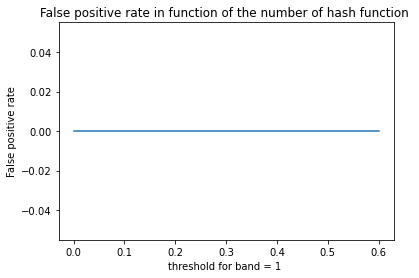

In [10]:
data = []

import matplotlib.pyplot as plt
from statistics import mean

#precision = 10 # number of experements with threshold

params_vector = [0.001,0.02,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6]
result_vector = []

for param in params_vector:

    result_vector.append(p.compare_lsh_vs_exaustive(param))
        

plt.xlabel('threshold for band = 1 ')
plt.ylabel('False positive rate')
plt.title('False positive rate in function of the number of hash function ');
plt.plot(params_vector,result_vector,label="t1")
#plt.legend(loc='upper center')





 lsh time : 10.468098 
 lsh time : 7.661759 
 lsh time : 1.763572 
 lsh time : 2.089677 
 lsh time : 1.435872 
 lsh time : 1.201952 


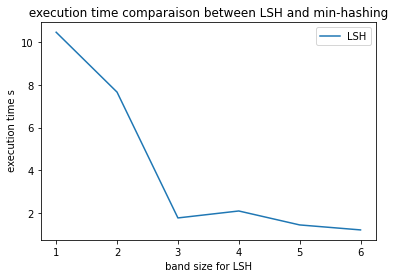

In [11]:
params_vector = [1,2,3,4,5,6]
result_vector = []
ls = []

#st = p.compute_all_similarities()

for param in params_vector:
    result_vector.append(p.compute_similarities_with_lsh(param))
    #ls.append(st)
        

plt.xlabel(' band size for LSH ')
plt.ylabel(' execution time s')
plt.title(' execution time comparaison between LSH and min-hashing ');
#plt.plot(params_vector,ls,label="Min-hashing")
plt.plot(params_vector,result_vector,label="LSH")
plt.legend(loc='upper right')


 lsh time : 17.523176 
 lsh time : 3.950050 
 lsh time : 2.628354 
 lsh time : 2.120942 
 lsh time : 1.508219 
 lsh time : 0.501624 


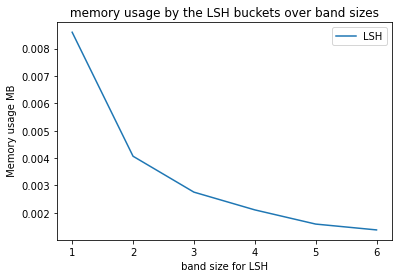

In [12]:



params_vector = [1,2,3,4,5,6]
result_vector = []
ls = []

#st = p.compute_all_similarities()

for param in params_vector:
    p.compute_similarities_with_lsh(param)
    result_vector.append(p.get_lsh_buckets_size())
    #ls.append(st)
        

plt.xlabel(' band size for LSH ')
plt.ylabel(' Memory usage MB')
plt.title(' memory usage by the LSH buckets over band sizes ');
#plt.plot(params_vector,ls,label="Min-hashing")
plt.plot(params_vector,result_vector,label="LSH")
plt.legend(loc='upper right')


 lsh time : 4.997790 
matched pairs 3986 true positive 8787 rate is 0.687935
matched pairs 3695 true positive 1445 rate is 0.281128
matched pairs 2007 true positive 88 rate is 0.042005
matched pairs 1065 true positive 7 rate is 0.006530
matched pairs 502 true positive 0 rate is 0.000000
matched pairs 77 true positive 0 rate is 0.000000
matched pairs 18 true positive 0 rate is 0.000000
matched pairs 8 true positive 0 rate is 0.000000
matched pairs 7 true positive 0 rate is 0.000000
matched pairs 3 true positive 0 rate is 0.000000
 lsh time : 1.629204 
matched pairs 715 true positive 12058 rate is 0.944023
matched pairs 714 true positive 4426 rate is 0.861089
matched pairs 601 true positive 1494 rate is 0.713126
matched pairs 456 true positive 616 rate is 0.574627
matched pairs 322 true positive 180 rate is 0.358566
matched pairs 76 true positive 1 rate is 0.012987
matched pairs 18 true positive 0 rate is 0.000000
matched pairs 8 true positive 0 rate is 0.000000
matched pairs 7 true posi

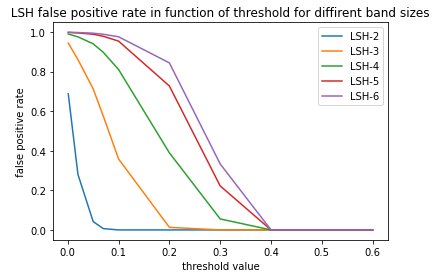

In [14]:
params_vector = [2,3,4,5,6]
thresholds = [0.001,0.02,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6]

result_vector = []


#st = p.compute_all_similarities()


    #ls.append(st)
        

plt.xlabel(' threshold value ')
plt.ylabel(' false positive rate ')
plt.title(' LSH false positive rate in function of threshold for diffirent band sizes ')


for param in params_vector:
    tmp = []
    p.compute_similarities_with_lsh(param)
    for th in thresholds:
        tmp.append(p.compare_lsh_vs_exaustive(th))
    result_vector.append(tmp)
    plt.plot(thresholds,tmp,label="LSH-"+param.__str__())

plt.legend(loc='upper right')
